In [383]:
import pandas as pd
import requests
import json 
import numpy as np
import matplotlib.pyplot as pl

In [384]:
import os
import pickle
import geopandas as gpd
from shapely.geometry import Polygon, Point

In [460]:
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA


In [432]:
threshold = 99
data_location = '../../data/threshold_{}percentile/ca_data_version_3.csv'.format(threshold)

In [433]:
solar = pd.read_csv(data_location)
solar.drop(columns='Unnamed: 0', index=1, inplace = True)

In [434]:
solar

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min_distance
0,33.808694,-116.123267,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,868.0,NaN,6.716675,"[149812.2726590896, 136770.8744561089, 168371....","[186.7151101902774, 170.8804919632514, 217.140...","[6.023068070654109, 6.102874712973266, 7.00454...","[156676.9986566772, 143847.3499534745, 176220....",1.859524e+06,19.4705
2,33.339396,-115.174074,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,425.0,NaN,6.764995,"[144516.3593749663, 148097.8132090358, 175562....","[181.8495609627761, 188.2728950639291, 227.919...","[5.86611486976697, 6.724031966568896, 7.352239...","[151186.7558117493, 155256.9241252177, 183816....",1.860760e+06,128.1298
3,37.954167,-121.969430,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,82.0,NaN,5.897817,"[96173.72130512354, 120312.542412835, 141419.0...","[116.6067532589445, 150.3203686240996, 179.493...","[3.761508169643369, 5.368584593717842, 5.79011...","[100873.0371669258, 125951.7057612103, 148151....",1.666310e+06,5.3229
4,33.319842,-115.260365,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,484.0,NaN,6.731896,"[137510.2144402229, 142402.842983947, 176418.5...","[170.9541471815402, 179.2420121822906, 228.486...","[5.514649909081941, 6.401500435081806, 7.37053...","[144075.5817489543, 149175.3389282349, 184759....",1.865764e+06,68.5997
5,35.275253,-119.941610,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,586.0,NaN,6.324492,"[121246.9801077209, 117066.2046358288, 160198....","[151.5559582784329, 146.1878006861621, 203.953...","[4.88890187994945, 5.220992881648648, 6.579147...","[126974.9317794576, 122684.1512913696, 167850....",1.756028e+06,150.7946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,37.289327,-119.898464,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,366.0,land_cover,5.867103,"[95328.95100877596, 108990.8799538894, 140092....","[118.9577276791649, 138.2276947748351, 180.570...","[3.837346054166609, 4.936703384815538, 5.82486...","[100087.7899723757, 114182.1553155137, 146825....",1.613157e+06,51.3515
4996,37.739071,-123.091203,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,land_cover,4.769962,"[98227.38502469758, 98822.17157712391, 129850....","[118.3652248845635, 120.7404967134668, 160.861...","[3.81823306079237, 4.312160596909529, 5.189078...","[102995.0341308273, 103710.1192841655, 136314....",1.399526e+06,94.2834
4997,41.825881,-124.428701,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,land_cover,4.515692,"[70004.71455549274, 81380.2869646436, 111258.6...","[85.00729048931791, 99.2293882865231, 137.4604...","[2.742170660945739, 3.543906724518682, 4.43420...","[73699.77919700817, 85539.98772560337, 116804....",1.309439e+06,350.9723
4998,37.680409,-122.551889,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,land_cover,4.833776,"[97087.35930445357, 100718.8764699389, 131161....","[117.8435888861197, 123.3396122809835, 163.353...","[3.801406093100635, 4.404986152892268, 5.26946...","[101818.921886468, 105641.3434799164, 137531.3...",1.404255e+06,8.4849


In [435]:
solar[solar['Solar_farm_present']==1]['land_cover'].values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [436]:
solar.columns


Index(['Latitude', 'Longitude', 'Solar_farm_present', 'State', 'panel.area',
       'power', 'panels', 'landscape.area', 'water', 'urban', 'Address',
       'land_cover', 'slope', 'elevation', 'feature_violated', 'solrad_annual',
       'ac_monthly', 'poa_monthly', 'solrad_monthly', 'dc_monthly',
       'ac_annual', 'min_distance'],
      dtype='object')

In [437]:
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,4999.000000,4999.000000,2604.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,4999.000000,4999.000000,4999.000000,4999.000000,4.999000e+03,4967.000000
mean,36.841178,-119.458227,0.077957,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.839968,9.095219,657.021204,6.074891,1.691385e+06,137.828306
std,2.572195,2.703062,0.268155,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.366672,10.275445,635.915603,0.519764,1.445148e+05,125.181642
min,32.537677,-124.428701,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-84.000000,4.113513,1.194338e+06,0.617400
25%,34.708184,-121.710559,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,1.000000,134.000000,5.688597,1.588260e+06,40.333250
50%,36.468054,-120.092617,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,4.000000,521.000000,6.064286,1.691620e+06,92.692900
75%,38.941649,-117.072459,0.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,16.000000,948.000000,6.575974,1.824094e+06,205.296250
max,42.001868,-114.181737,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,56.000000,4161.000000,7.024709,2.004422e+06,607.074200


In [438]:
solar.head()

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min_distance
0,33.808694,-116.123267,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,868.0,NaN,6.716675,"[149812.2726590896, 136770.8744561089, 168371....","[186.7151101902774, 170.8804919632514, 217.140...","[6.023068070654109, 6.102874712973266, 7.00454...","[156676.9986566772, 143847.3499534745, 176220....",1.859524e+06,19.4705
2,33.339396,-115.174074,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,425.0,NaN,6.764995,"[144516.3593749663, 148097.8132090358, 175562....","[181.8495609627761, 188.2728950639291, 227.919...","[5.86611486976697, 6.724031966568896, 7.352239...","[151186.7558117493, 155256.9241252177, 183816....",1.860760e+06,128.1298
3,37.954167,-121.969430,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,82.0,NaN,5.897817,"[96173.72130512354, 120312.542412835, 141419.0...","[116.6067532589445, 150.3203686240996, 179.493...","[3.761508169643369, 5.368584593717842, 5.79011...","[100873.0371669258, 125951.7057612103, 148151....",1.666310e+06,5.3229
4,33.319842,-115.260365,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,484.0,NaN,6.731896,"[137510.2144402229, 142402.842983947, 176418.5...","[170.9541471815402, 179.2420121822906, 228.486...","[5.514649909081941, 6.401500435081806, 7.37053...","[144075.5817489543, 149175.3389282349, 184759....",1.865764e+06,68.5997
5,35.275253,-119.941610,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,586.0,NaN,6.324492,"[121246.9801077209, 117066.2046358288, 160198....","[151.5559582784329, 146.1878006861621, 203.953...","[4.88890187994945, 5.220992881648648, 6.579147...","[126974.9317794576, 122684.1512913696, 167850....",1.756028e+06,150.7946


In [439]:
solar = solar[solar['min_distance'].notnull()]
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,4967.000000,4967.000000,2577.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,4967.000000,4967.000000,4967.000000,4967.000000,4.967000e+03,4967.000000
mean,36.864431,-119.464642,0.078774,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.843769,9.127441,660.736461,6.077718,1.691818e+06,137.828306
std,2.563982,2.710560,0.269438,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.363111,10.279015,636.156399,0.519944,1.447943e+05,125.181642
min,32.537677,-124.428701,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-84.000000,4.113513,1.194338e+06,0.617400
25%,34.727738,-121.710559,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,1.000000,141.000000,5.690856,1.588742e+06,40.333250
50%,36.487608,-120.114190,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,4.000000,527.000000,6.071488,1.693374e+06,92.692900
75%,38.951427,-117.050887,0.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,16.000000,953.000000,6.576765,1.824632e+06,205.296250
max,42.001868,-114.181737,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,56.000000,4161.000000,7.024709,2.004422e+06,607.074200


In [440]:
solar = solar[solar['Solar_farm_present'].notnull()]

In [441]:
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,2577.000000,2577.000000,2577.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,2577.000000,2577.000000,2577.000000,2577.000000,2.577000e+03,2577.000000
mean,37.552507,-120.002192,0.078774,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.698875,13.308110,939.223516,5.974369,1.670137e+06,164.896627
std,2.674235,2.577276,0.269438,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.458836,11.792746,733.226689,0.572315,1.633755e+05,131.225940
min,32.537677,-124.428701,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-80.000000,4.113513,1.194338e+06,2.173700
25%,35.275253,-122.163583,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,0.000000,2.000000,350.000000,5.586981,1.556226e+06,56.571000
50%,37.269773,-120.394633,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,12.000000,899.000000,5.935273,1.657686e+06,126.650700
75%,40.066011,-117.805926,0.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,23.000000,1369.000000,6.532647,1.826763e+06,251.330400
max,42.001868,-114.181737,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,56.000000,4161.000000,7.024709,2.004422e+06,607.074200


In [442]:
solar_existing = solar[solar['Solar_farm_present']==1]
solar_non_existing = solar[solar['Solar_farm_present']==0]
solar_non_existing_sample = solar_non_existing.sample(300, random_state = 42)
solar = pd.concat([solar_existing, solar_non_existing_sample])
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,503.000000,503.000000,503.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02,503.000000
mean,36.782630,-119.504497,0.403579,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.799205,9.242545,753.332008,6.082926,1.696389e+06,121.080321
std,2.671026,2.456910,0.491103,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.400994,11.301589,674.434297,0.531692,1.468944e+05,122.084271
min,32.596339,-124.363984,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-70.000000,4.333783,1.265258e+06,2.173700
25%,34.708184,-121.440902,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,174.000000,5.706973,1.600547e+06,25.104650
50%,36.096526,-119.057135,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,3.000000,737.000000,6.080469,1.690557e+06,74.279800
75%,39.000312,-117.590201,1.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,17.000000,1086.000000,6.596325,1.836875e+06,195.035400
max,42.001868,-114.505325,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,43.000000,3766.000000,6.920728,1.943915e+06,601.345800


In [443]:
req_col = ['land_cover','slope', 'elevation',  'solrad_annual','ac_annual', 'min_distance']
X = solar[req_col]
Y = solar['Solar_farm_present']

In [444]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

sd = StandardScaler()
columns_ML_excluding_LC = ['slope', 'elevation',  'solrad_annual','ac_annual', 'min_distance']
X_train_excluding_LC = X_train[columns_ML_excluding_LC ]
temp = np.hstack((sd.fit_transform(X_train_excluding_LC),X_train['land_cover'].values.reshape((-1,1))))
X_train_2 = pd.DataFrame(temp, columns = columns_ML_excluding_LC + ['land_cover'])

X_test_excluding_LC = X_test[columns_ML_excluding_LC ]
temp = np.hstack((sd.transform(X_test_excluding_LC),X_test['land_cover'].values.reshape((-1,1))))
X_test_2 = pd.DataFrame(temp, columns = columns_ML_excluding_LC+['land_cover'])


assert np.sum(np.abs(X_test_2['land_cover'].values - X_test['land_cover'].values)) == 0
assert np.sum(np.abs(X_train_2['land_cover'].values - X_train['land_cover'].values)) == 0

X_test = X_test_2
X_train = X_train_2


In [445]:
len(X_train),len(X_test)

(352, 151)

In [446]:
svm = SVC(kernel='rbf', gamma=0.1, C=1.0, random_state= 113)

params = {"C":(0.1, 1, 2,4),  
          "kernel":('linear', 'rbf','poly')}

svm_cv = GridSearchCV(svm, params, scoring="accuracy", n_jobs=-1, verbose=2, cv=5)
svm_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1,

GridSearchCV(cv=5, estimator=SVC(gamma=0.1, random_state=113), n_jobs=-1,
             param_grid={'C': (0.1, 1, 2, 4),
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='accuracy', verbose=2)

In [447]:
svm_cv.best_params_

{'C': 4, 'kernel': 'rbf'}

In [544]:
# svm_tuned = SVC(**svm_cv.best_params_, random_state=113)
svm_tuned = SVC(C=4,kernel='rbf',random_state=113)
pca = PCA(n_components=6)
Xreduced = pca.fit_transform(X_train)
# Xreduced = np.vstack([X_train['ac_annual'].values, X_train['solrad_annual'].values]).T
print(Xreduced.shape,y_train.shape)
svm_tuned.fit(Xreduced, y_train)
y_pred_train_svm = svm_tuned.predict(Xreduced) 
Xreducedtest = pca.transform(X_test)
# Xreducedtest = np.vstack([X_test['ac_annual'].values, X_test['solrad_annual'].values]).T
y_pred_test_svm = svm_tuned.predict(Xreducedtest)

(352, 6) (352,)


how much variance in PCA? Weights in different features using PCA.
Conclusion:
Decision boundaries, non-trivial points, key take away points, future improvements.

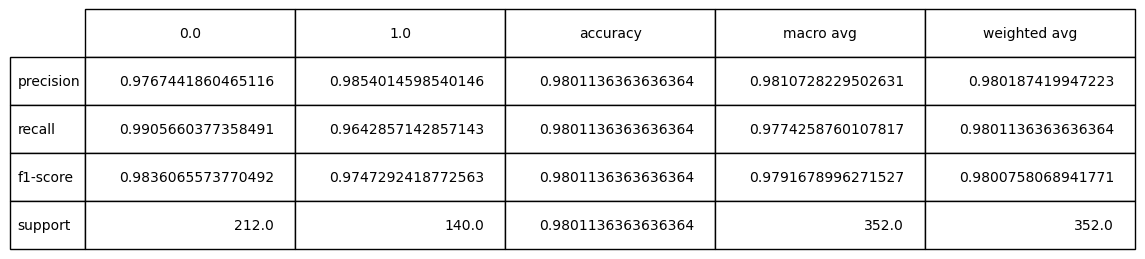

In [545]:
df = pd.DataFrame(classification_report(y_train, y_pred_train_svm, output_dict=True))
fig, ax = pl.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
pl.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

## Predicting on new solar farms

In [547]:
file_loc = '../../data/2km_grid_and_USPVDB_data.csv'
new_data = pd.read_csv(file_loc)
new_data.head()

,Latitude,Longitude,solar_farm_present
0,36.177601,-120.109001,1
1,33.265202,-116.328003,1
2,34.823002,-118.348000,1
3,34.707401,-118.305000,1
4,34.708599,-118.274002,1


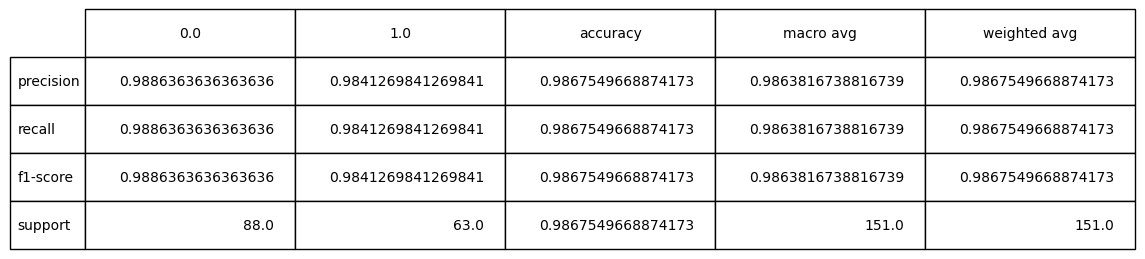

In [546]:
df = pd.DataFrame(classification_report(y_test, y_pred_test_svm, output_dict=True))
fig, ax = pl.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
pl.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

## Decision boundary

In [488]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

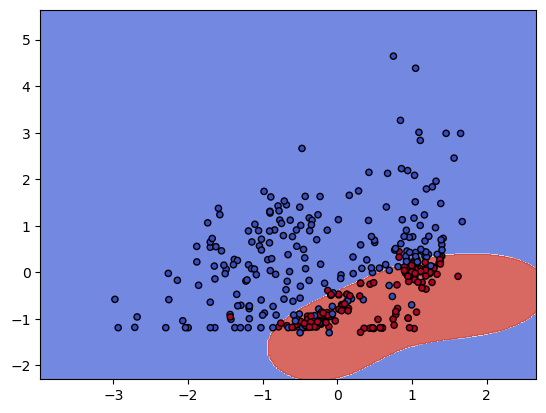

In [542]:
pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X_train)
Xreduced = np.vstack([X_train['ac_annual'].values, X_train['elevation'].values]).T

X0, X1 = Xreduced[:,0], Xreduced[:,1]
xx, yy = make_meshgrid(X0, X1)

model = SVC(kernel='rbf',C=4)
clf = model.fit(Xreduced, y_train)

fig, ax = pl.subplots()
plot_contours(ax, clf, xx, yy, cmap=pl.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=pl.cm.coolwarm, s=20, edgecolors='k')

In [464]:
Xreduced

array([[-9.85330433e-01, -1.53908127e+00],
       [ 6.75998893e-01, -1.13967258e+00],
       [ 1.27149306e+00, -1.12725496e+00],
       [ 1.41531244e+00, -1.29152549e+00],
       [ 1.12756911e+00,  6.92467030e-01],
       [ 1.17700196e+00, -1.34560961e+00],
       [-3.00400353e-02,  8.91218778e-01],
       [ 2.25654407e+00,  1.57701756e-01],
       [ 6.64196258e-01, -1.34738158e+00],
       [-1.34405127e+00, -1.57303326e+00],
       [ 1.28673208e+00,  2.91713989e+00],
       [-1.43934881e-01,  1.23430648e+00],
       [ 1.37237645e+00, -1.14928523e+00],
       [-2.98559371e-01, -8.74378397e-02],
       [ 2.30585727e+00,  8.06850499e-01],
       [ 1.30533170e+00, -1.28396824e+00],
       [ 1.36303129e+00, -1.21201882e+00],
       [ 1.43558059e+00,  2.33135540e+00],
       [-1.07054560e+00, -1.49481917e+00],
       [ 2.20937413e-01, -8.96865706e-01],
       [-1.14615069e+00, -1.21109393e+00],
       [ 1.39516865e+00,  2.20982800e+00],
       [ 1.05230736e+00, -1.40648053e+00],
       [ 6.

In [452]:
print(np.sum(np.abs(y_pred_train_svm - y_train.values))/len(y_train))
# thresholds
solar_slopes = solar.loc[solar['Solar_farm_present']==1]['slope'].values.copy()
solor_elevations = solar.loc[solar['Solar_farm_present']==1]['elevation'].values.copy()
solar_distance = solar.loc[solar['Solar_farm_present']==1]['min_distance'].values.copy()
solar_ac_annual = solar.loc[solar['Solar_farm_present']==1]['ac_annual'].values.copy()

slope_threshold = np.percentile(solar_slopes,threshold)
elevations_threshold = np.percentile(solor_elevations,threshold)
distance_threshold = np.percentile(solar_distance,threshold)
ac_threshold = np.percentile(solar_ac_annual,threshold)
print('slope_th:{}, elevation_th:{}, distance_th:{}, ac_th:{}'.format(slope_threshold,elevations_threshold,distance_threshold,ac_threshold))

print(np.sum(np.abs(y_pred_test_svm - y_test.values))/len(y_test))

0.019886363636363636
slope_th:20.93999999999997, elevation_th:976.96, distance_th:406.78717999999907, ac_th:1901117.26053907
0.013245033112582781


In [454]:
X_train

,slope,elevation,solrad_annual,ac_annual,min_distance,land_cover
0,-0.836029,-0.077482,0.975535,0.947692,-0.942847,1.0
1,-0.836029,-1.056516,-0.061279,-0.195445,-0.403599,1.0
2,-0.836029,-1.175797,-0.489869,-0.577363,-0.645999,1.0
3,-0.836029,-1.188189,-0.521213,-0.448278,-0.908406,0.0
4,-0.748366,0.568495,-1.157300,-1.043854,0.449924,1.0
...,...,...,...,...,...,...
347,-0.748366,-0.021714,1.079009,1.040847,-0.900710,1.0
348,-0.047069,1.051815,-0.947526,-0.747917,1.558795,1.0
349,0.566567,-0.021714,-2.119433,-2.263688,0.999513,0.0
350,-0.397717,1.301221,-1.139931,-0.902981,1.231676,1.0


In [ ]:
fake_data = 